<a href="https://colab.research.google.com/github/keerth3304/Linear-Algebra_the-coding-way/blob/main/Eigen%20Values%20and%20Vectors/EigenValuesVectors_Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

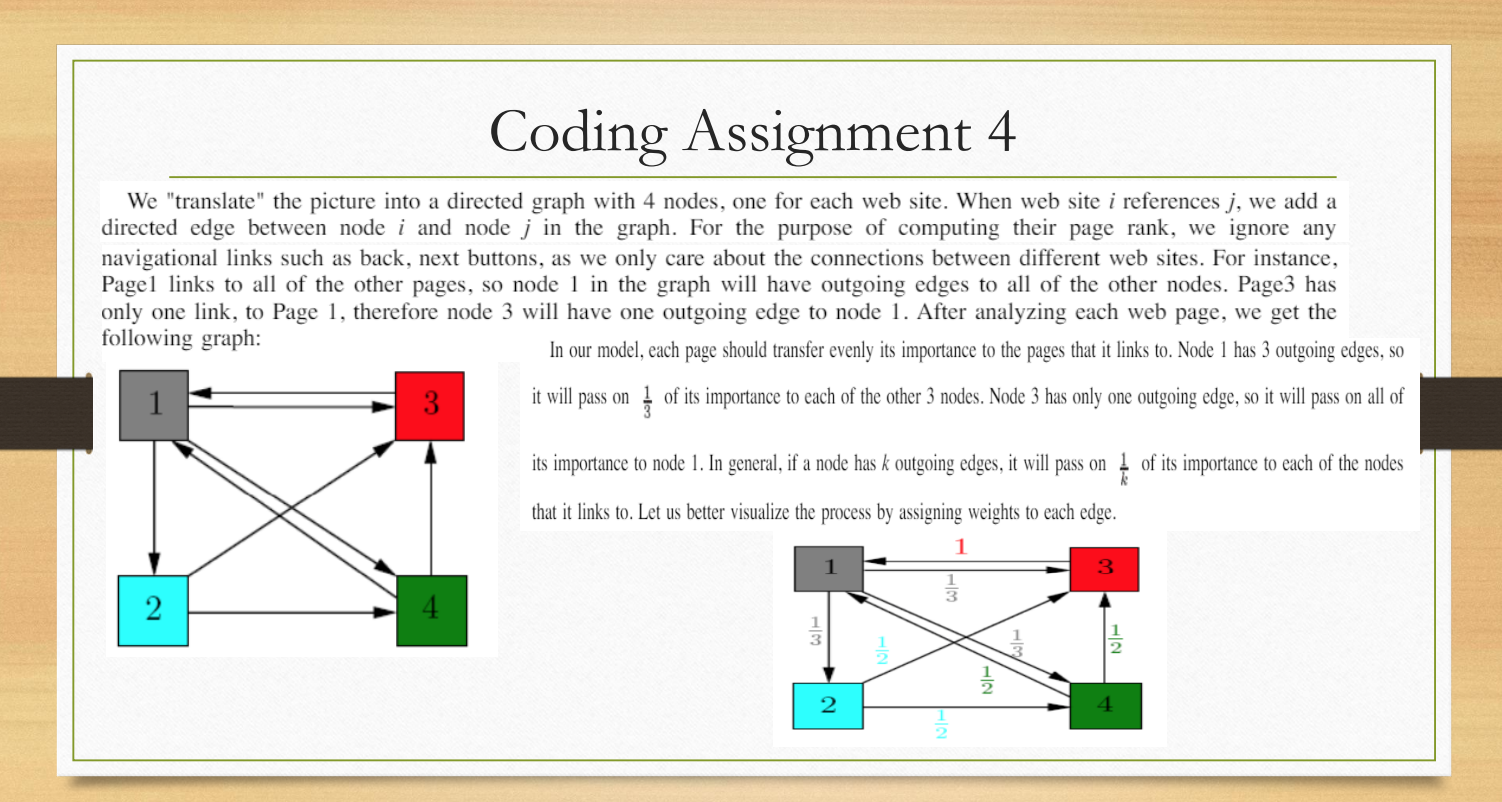

1. Formulate the importance of each page as a linear algebra problem
2. Verify the solution to the problem is a Eigen Vector
3. Rescale the Eigenvector as a probability by making sure sum of all entries in the Eigenvector=1

In [1]:
#importing numpy library
import numpy as np

In [2]:
#Adjacency matrix of the directed graph without considering the weights
pages=[[0,1,1,1],
 [0,0,1,1],
  [1,0,0,0],
   [1,0,1,0]]

In [3]:
# Define the function 'formulate_stochasticmatrix' with parameters 'pages' and 'count_one'
def formulate_stochasticmatrix(pages, count_one):
    # Initialize an empty list called 'st_matrix' to store results
    st_matrix = []

    # Determine the number of rows and columns in 'pages'
    row = len(pages)
    col = len(pages[0])

    # Loop through each row of 'pages'
    for i in range(row):
        # Create a new list 'st' using a comprehension
        st = [1 / count_one[i] if pages[i][j] != 0 else 0 for j in range(col)]

        # Append 'st' to 'st_matrix'
        st_matrix.append(st)

    # Transpose 'st_matrix' using zip and list comprehension
    st_matrix_transposed = [list(row) for row in zip(*st_matrix)]

    # Return the transposed matrix
    return st_matrix_transposed

In [4]:
# Define the function 'formulate_equation_and_matrix' with parameter 'pages'
def formulate_equation_and_matrix(pages):
    # Initialize lists 'count_one' and 'la_equation'
    count_one = []
    la_equation = []

    # Determine the number of rows and columns in 'pages'
    row = len(pages)
    col = len(pages[0])

    # Loop through each row of 'pages' to count occurrences of '1's
    for i in range(row):
        count = 0
        for j in range(col):
            if pages[i][j] == 1:
                count += 1
        count_one.append(count)

    # Call the function 'formulate_stochasticmatrix' to get 'st_matrix'
    st_matrix = formulate_stochasticmatrix(pages, count_one)

    # Loop through each row of 'pages' to formulate linear equations
    for i in range(row):
        equation = f"page{i+1}="
        for j in range(col):
            if pages[i][j] != 0:
                equation += f"1/{count_one[i]}*page{j+1} + "
        equation = equation[:-2]  # Remove the extra ' + ' at the end
        la_equation.append(equation)

    # Return the list of linear equations and the stochastic matrix
    return la_equation, st_matrix

In [5]:
# Call the function 'formulate_equation_and_matrix' and unpack the returned values
equations, st_matrix = formulate_equation_and_matrix(pages)

# Print the linear algebra equations
print("Linear Algebra Equation:")
for row in equations:
    print(row)

# Print the stochastic matrix
print("\nStochastic or Transition Matrix")
for row in st_matrix:
    print(row)

Linear Algebra Equation:
page1=1/3*page2 + 1/3*page3 + 1/3*page4 
page2=1/2*page3 + 1/2*page4 
page3=1/1*page1 
page4=1/2*page1 + 1/2*page3 

Stochastic or Transition Matrix
[0, 0, 1.0, 0.5]
[0.3333333333333333, 0, 0, 0]
[0.3333333333333333, 0.5, 0, 0.5]
[0.3333333333333333, 0.5, 0, 0]


In [6]:
# Convert 'st_matrix' to a NumPy array
st_matrix_array = np.array(st_matrix)

# Calculate eigenvalues and eigenvectors of 'st_matrix_array'
eigenvalues, eigenvectors = np.linalg.eig(st_matrix_array)

# Print the eigenvalues
print("Eigen values are:")
print(eigenvalues)

# Extract the real part of eigenvalues
eigenvalue_real = np.real(eigenvalues)
print("\nClosest Eigen value considering only real part:")
print(eigenvalue_real)

# Print the eigenvectors
print("\nEigen vectors:")
print(eigenvectors)

Eigen values are:
[ 1.        +0.j         -0.36062333+0.41097555j -0.36062333-0.41097555j
 -0.27875333+0.j        ]

Closest Eigen value considering only real part:
[ 1.         -0.36062333 -0.36062333 -0.27875333]

Eigen vectors:
[[ 0.72101012+0.j         -0.75521571+0.j         -0.75521571-0.j
   0.50648562+0.j        ]
 [ 0.24033671+0.j          0.3036721 +0.34607247j  0.3036721 -0.34607247j
  -0.60565568+0.j        ]
 [ 0.54075759+0.j          0.09315321-0.2746779j   0.09315321+0.2746779j
  -0.38153917+0.j        ]
 [ 0.36050506+0.j          0.3583904 -0.07139457j  0.3583904 +0.07139457j
   0.48070923+0.j        ]]


In [7]:
#Equation can be formulated as the matrix Av=v  where in the equation of eigen vectors Av=^v (^-Eigen values, v- Eigen vector)
#So when Eigen value=1 ,then the equation holds
#Finding the eigen vector that correspond to the eigen value 1
def EigenVectorTo1(eigenvalue_real, eigenvectors):
    # Initialize index and number of eigenvalues
    ind = 0
    no_of_eigen_values = len(eigenvalue_real)

    # Loop through each eigenvalue
    for i in range(no_of_eigen_values):
        # Check if the eigenvalue is approximately equal to 1.0 after rounding
        if round(eigenvalue_real[i]) == 1.0:
            # Extract the corresponding eigenvector
            eigenvector_needed = np.real(eigenvectors[:, ind])
            return eigenvector_needed  # Return the eigenvector if condition is met
        ind += 1  # Increment index for next iteration

In [9]:
# Call the EigenVectorTo1 function to get the eigenvector corresponding to eigenvalue 1
eigenvector_needed = EigenVectorTo1(eigenvalue_real, eigenvectors)

# Print the eigenvector
print("Eigen vector that corresponds to Eigen value 1:")
print(eigenvector_needed)

Eigen vector that corresponds to Eigen value 1:
[0.72101012 0.24033671 0.54075759 0.36050506]


In [10]:
# Calculate the sum of elements in 'eigenvector_needed' using np.sum
sum_eigenvector = np.sum(eigenvector_needed)

# Scale the eigenvector by dividing each element by the sum
scaled = eigenvector_needed.real / sum_eigenvector

# Print the scaled eigenvector
print(scaled)

#Scaling in this context refered to adjusting the values of eigenvectors so that their sum becomes 1.0.
#This normalization ensures that the scaled eigenvector represents a probability distribution where the sum of probabilities equals 1.0

print("Sum of the scaled values",round(sum(scaled),6))

[0.38709677 0.12903226 0.29032258 0.19354839]
Sum of the scaled values 1.0


In [11]:
# Print the PageRank of the pages
print("PageRank of the pages")
leng = len(scaled)
for i in range(leng):
    print(f"Page{i+1} = {round(scaled[i], 3)}")

PageRank of the pages
Page1 = 0.387
Page2 = 0.129
Page3 = 0.29
Page4 = 0.194
